In [13]:
%matplotlib notebook
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X,y = make_blobs(random_state =0)
X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state=0)
logreg = LogisticRegression().fit(X_train,y_train)
print('Test Accuracy {}'.format(logreg.score(X_test,y_test)))

Test Accuracy 0.88


In [14]:
import mglearn

<IPython.core.display.Javascript object>


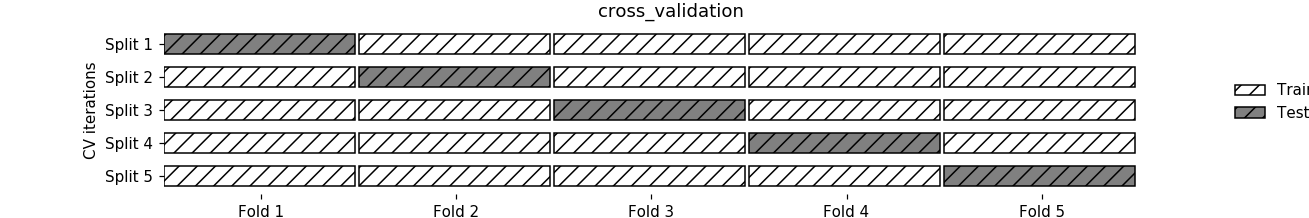

In [15]:
mglearn.plots.plot_cross_validation()

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg  =LogisticRegression()
score =cross_val_score(logreg,iris.data,iris.target,cv=3)
print(score)

[ 0.96078431  0.92156863  0.95833333]


## Stratified K-Fold Cross_Validation 

In [16]:
from sklearn.datasets import load_iris
iris  = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<IPython.core.display.Javascript object>


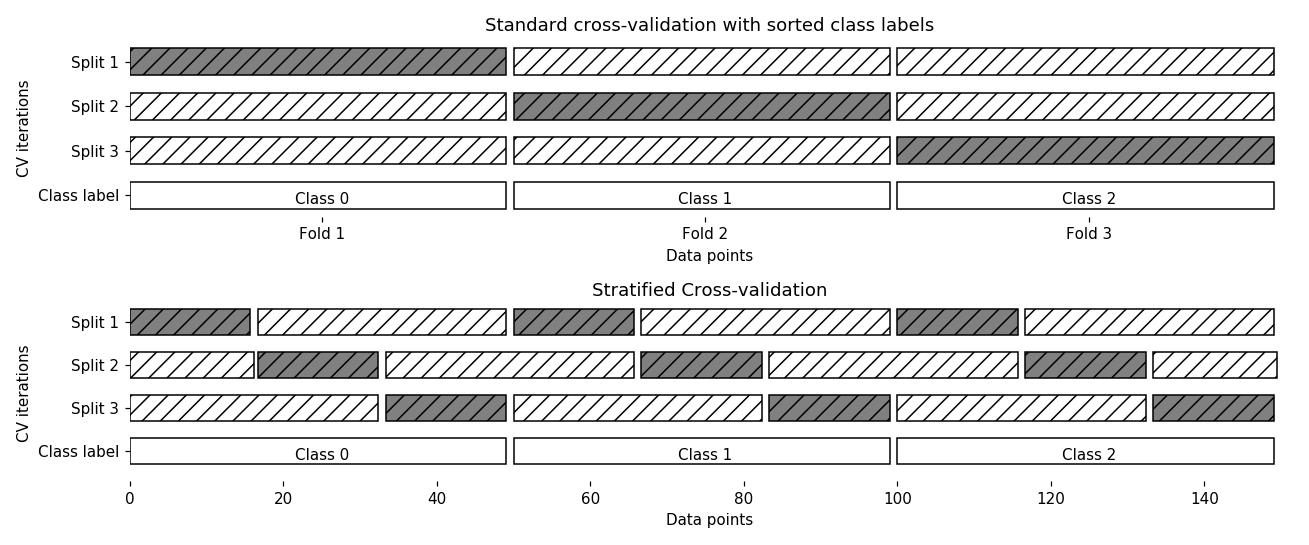

In [19]:
mglearn.plots.plot_stratified_cross_validation()

In [32]:
# NON - Stratified k - fold classifier
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
kFold = KFold(n_splits=3)
iris = load_iris()
logreg  =LogisticRegression()
score =cross_val_score(logreg,iris.data,iris.target,cv=kFold)
print(score)

[ 0.  0.  0.]


In [36]:
# Leave one out
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg,iris.data,iris.target,cv =loo)
scores.mean()

0.95333333333333337

<IPython.core.display.Javascript object>


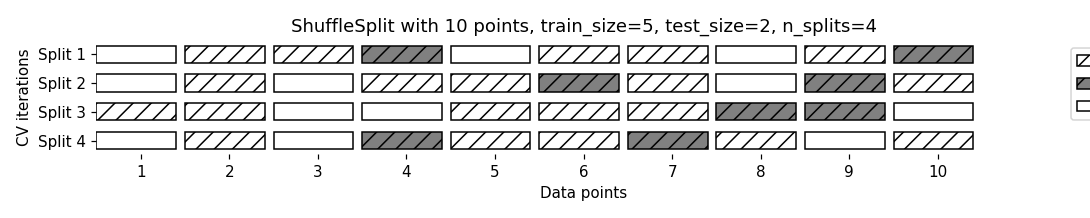

In [38]:
# shuffle split
mglearn.plots.plot_shuffle_split()

In [44]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = .5 , train_size =.5 , n_splits = 10)

scores = cross_val_score(logreg,iris.data,iris.target , cv=shuffle_split)
scores

array([ 0.96      ,  0.94666667,  0.98666667,  0.94666667,  0.93333333,
        0.97333333,  0.97333333,  0.92      ,  0.92      ,  0.92      ])

In [47]:
# Group K fold
from sklearn.model_selection import GroupKFold
X,y = make_blobs(n_samples=12,random_state=0)

groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg,X,y,groups,cv =GroupKFold(n_splits =3))
scores

array([ 0.75      ,  0.8       ,  0.66666667])

## Grid Search

In [80]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score =0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm  = SVC(gamma=gamma,C=C).fit(X_train,y_train)
        score = svm.score(X_test,y_test)
       # print(score)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print(best_score)
print(best_parameters)

Size of training set: 112   size of test set: 38
0.973684210526
{'C': 100, 'gamma': 0.001}


<IPython.core.display.Javascript object>


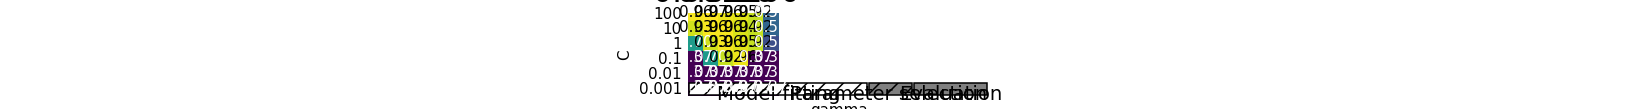

In [79]:
mglearn.plots.plot_threefold_split()

In [93]:
# Dividing into three sets
from sklearn.svm import SVC
X_trainval,X_test ,y_trainval,y_test = train_test_split(iris.data,iris.target,random_state=0)

X_train,X_valid , y_train,y_valid = train_test_split(X_trainval,y_trainval,random_state=1)

best_score =0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm  = SVC(gamma=gamma,C=C).fit(X_train,y_train)
        score = svm.score(X_valid,y_valid)
       # print(score)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm  = SVC(C=best_parameters['C'],gamma=best_parameters['gamma']).fit(X_trainval,y_trainval)
print('Validation Set accuracy',best_score)
print(best_parameters)
print('Actual Test Score',svm.score(X_test,y_test))

Validation Set accuracy 0.964285714286
{'C': 10, 'gamma': 0.001}
Actual Test Score 0.921052631579


In [94]:
# GRID Search CV

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search  = GridSearchCV(SVC(),param_grid,cv = 5)
X_train , X_test,y_train,y_test  = train_test_split(iris.data,iris.target,random_state=0)
grid_search.fit(X_train,y_train)
grid_search.score (X_test,y_test)

0.97368421052631582

In [101]:
grid_search.best_params_

{'C': 100, 'gamma': 0.01}

In [102]:
grid_search.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [107]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
(results.head())

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001201,0.000600,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000401,0.000490,0.011371,0.002852
1,0.001200,0.000401,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000400,0.000491,0.011371,0.002852
2,0.001201,0.000401,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000400,0.000491,0.011371,0.002852
3,0.001201,0.000400,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000401,0.000490,0.011371,0.002852
4,0.001804,0.000199,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000751,0.000397,0.011371,0.002852


<IPython.core.display.Javascript object>


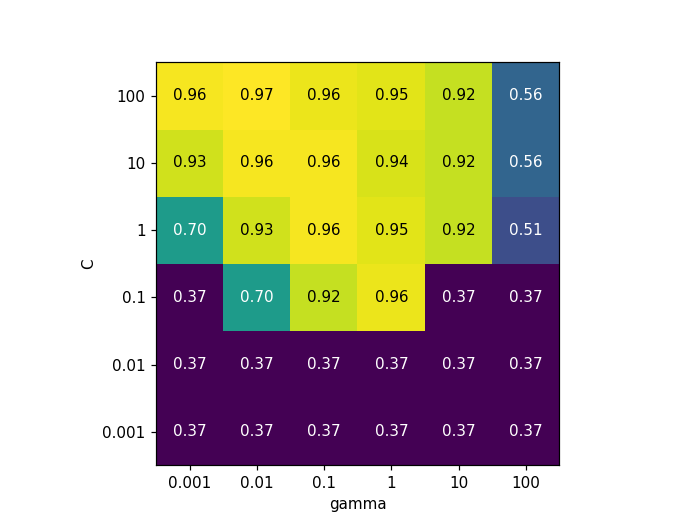

In [111]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [114]:
np.array(results.mean_test_score).reshape(6,6)

array([[ 0.36607143,  0.36607143,  0.36607143,  0.36607143,  0.36607143,
         0.36607143],
       [ 0.36607143,  0.36607143,  0.36607143,  0.36607143,  0.36607143,
         0.36607143],
       [ 0.36607143,  0.69642857,  0.91964286,  0.95535714,  0.36607143,
         0.36607143],
       [ 0.69642857,  0.92857143,  0.96428571,  0.94642857,  0.91964286,
         0.50892857],
       [ 0.92857143,  0.96428571,  0.96428571,  0.9375    ,  0.91964286,
         0.5625    ],
       [ 0.96428571,  0.97321429,  0.95535714,  0.94642857,  0.91964286,
         0.5625    ]])

<IPython.core.display.Javascript object>


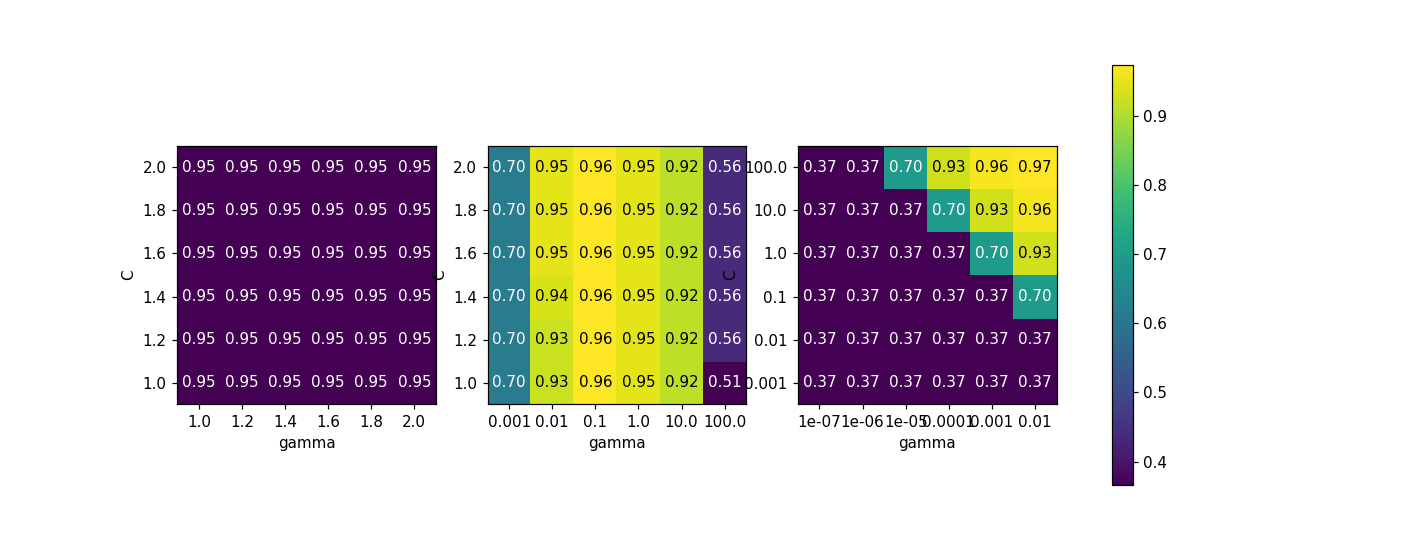

In [123]:
fig,axes = plt.subplots(1,3, figsize=(13,5))
param_grid_linear  = {'C':np.linspace(1,2,6)   ,
                      'gamma':np.linspace(1,2,6)
                     }
param_grid_one_log  = {'C':np.linspace(1,2,6)   ,
                      'gamma':np.logspace(-3,2,6)
                     }
param_grid_range  = {'C':np.logspace(-3,2,6)   ,
                      'gamma':np.logspace(-7,-2,6)
                     }
for param_grid , ax in zip([param_grid_linear,param_grid_one_log,param_grid_range],axes):
    grid_search= GridSearchCV(SVC(),param_grid,cv=5)
    grid_search.fit(X_train,y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    score_image =mglearn.tools.heatmap(scores,xlabel='gamma',ylabel='C',
                                      xticklabels = param_grid['gamma'],
                                      yticklabels = param_grid['C'],
                                      cmap='viridis',ax=ax)
plt.colorbar(score_image,ax = axes.tolist())

<IPython.core.display.Javascript object>


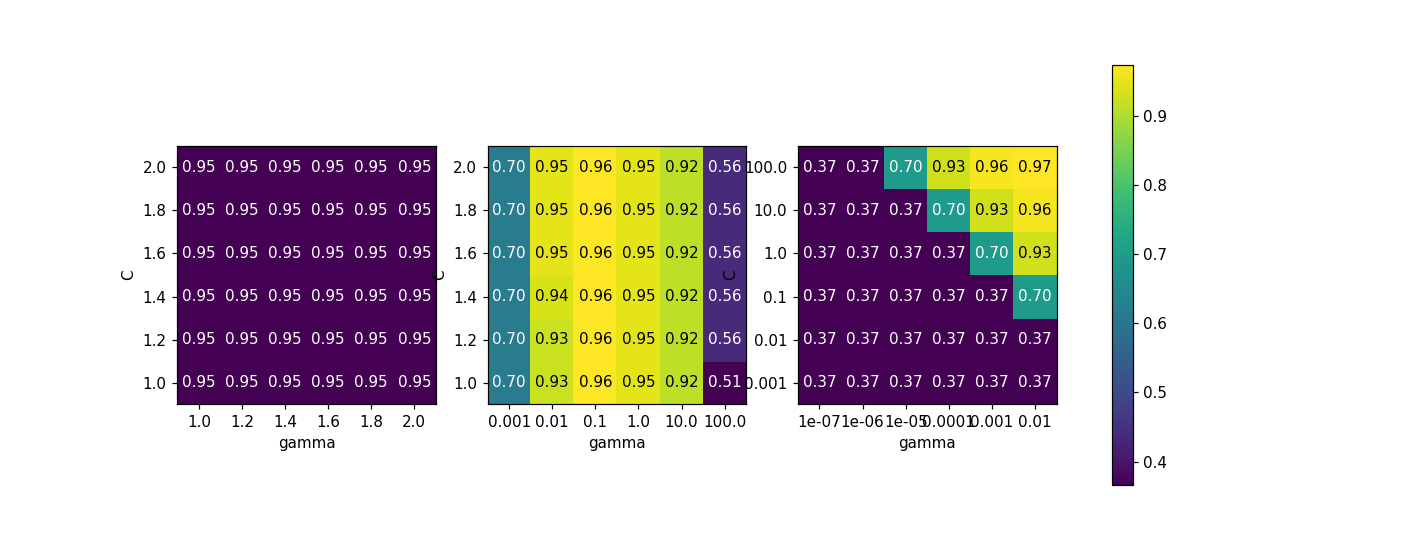

In [119]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

In [127]:
param_grid =[{
             'kernel':['rbf']  ,
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]
             },
             {
             'kernel':['rbf']  ,
             'C': [0.001, 0.01, 0.1, 1, 10, 100]
             }
            ]
param_grid

[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
  'kernel': ['rbf']},
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}]

In [129]:
grid_search = GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [130]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.014918,0.000802,0.366071,0.366079,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",26,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,2.533220e-02,0.000401,0.011371,0.002852
1,0.002203,0.000600,0.366071,0.366079,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",26,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.032617e-04,0.000490,0.011371,0.002852
2,0.001601,0.000400,0.366071,0.366079,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",26,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.898825e-04,0.000490,0.011371,0.002852
3,0.001402,0.002217,0.366071,0.366079,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",26,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.893328e-04,0.003463,0.011371,0.002852
4,0.001001,0.000401,0.366071,0.366079,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",26,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,5.135693e-07,0.000491,0.011371,0.002852
5,0.001399,0.001206,0.366071,0.366079,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",26,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.920138e-04,0.000991,0.011371,0.002852
6,0.001601,0.000400,0.366071,0.366079,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",26,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,1.744691e-03,0.000490,0.011371,0.002852
7,0.001001,0.000200,0.366071,0.366079,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",26,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,6.327867e-04,0.000400,0.011371,0.002852
8,0.000601,0.000400,0.366071,0.366079,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",26,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.908422e-04,0.000491,0.011371,0.002852
9,0.001005,0.000000,0.366071,0.366079,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",26,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,7.853205e-06,0.000000,0.011371,0.002852


In [132]:
# NEsted Cross-Validation
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                        iris.data,iris.target,cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [ 0.96666667  1.          0.96666667  0.96666667  1.        ]
Mean cross-validation score:  0.98
